# <center> Candidate Caves

Source: https://astrogeology.usgs.gov/search/map/Mars/MarsCaveCatalog/mars_cave_catalog

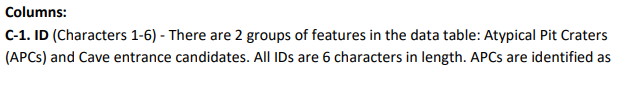

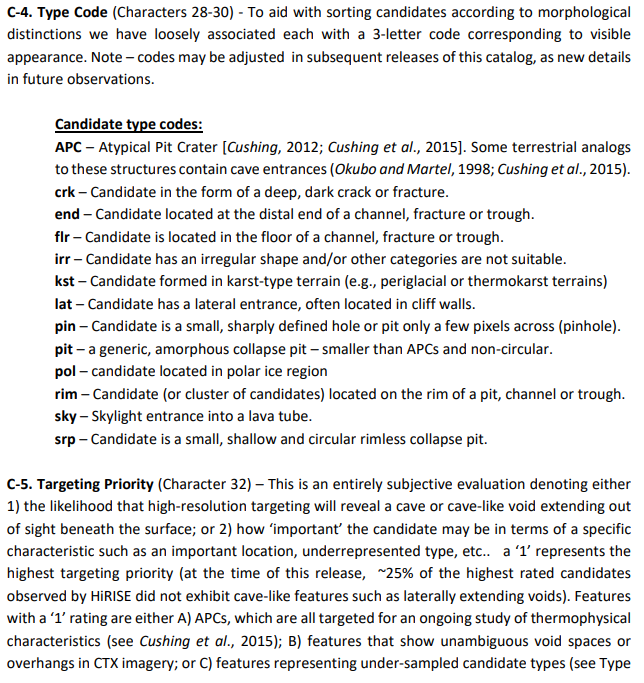

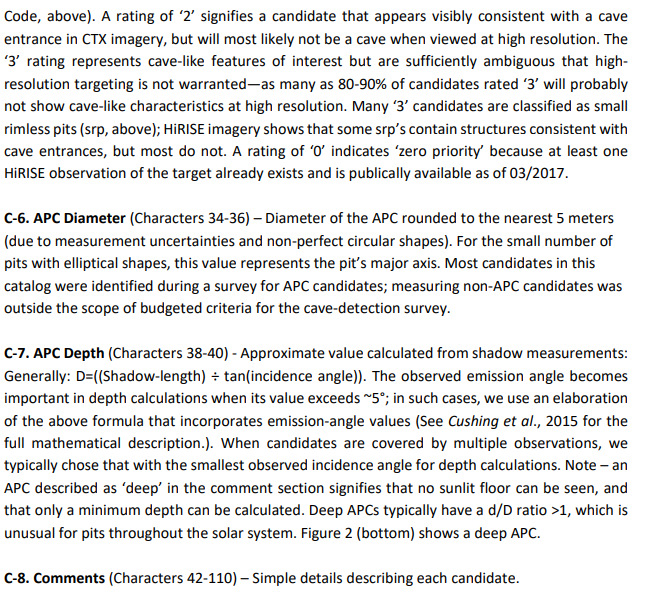

## Data Importing

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyplot_themes as themes
import seaborn as sns
from seaborn import palplot
import numpy as np
import mplcyberpunk

cavesData = pd.read_csv("Mars_Cave_Catalog.csv")
df = pd.DataFrame(cavesData)

# APC – Atypical Pit Crater
# crk – Candidate in the form of a deep, dark crack or fracture.
# end – Candidate located at the distal end of a channel, fracture or trough.
# flr – Candidate is located in the floor of a channel, fracture or trough.
# irr – Candidate has an irregular shape and/or other categories are not suitable.
# kst – Candidate formed in karst-type terrain (e.g., periglacial or thermokarst terrains) 
# lat – Candidate has a lateral entrance, often located in cliff walls.
# pin – Candidate is a small, sharply defined hole or pit only a few pixels across (pinhole). 
# pit – a generic, amorphous collapse pit – smaller than APCs and non-circular.
# pol – candidate located in polar ice region
# rim – Candidate (or cluster of candidates) located on the rim of a pit, channel or trough.
# sky – Skylight entrance into a lava tube.
# srp – Candidate is a small, shallow and circular rimless collapse pit. 


df.groupby(["TypeCode:string","Priority:string"]).describe()


#==================================================================================================
# Just look at the first 3 columns.

# - lat (laterial) is probably best explored with a walking or craft with treaded movement

# - sky (skylight) is probably best explored with a flying craft

# - I *think* we should target "Priority: 0" caves. At least one HiRISE observation
#   should exit and be publically available (this does not mean the cave is explored, but these
#   are most likely to have evidence that they are actually caves)

latitude:string                          \
                                          count        mean         std   
TypeCode:string Priority:string                                           
APC             0                          19.0  243.798721    8.923681   
                1                         113.0  230.587846   29.848557   
con             1                           2.0  240.993950    0.000212   
crk             0                          59.0  151.245653   78.266281   
                1                           5.0  226.021780   29.761895   
                2                          14.0  223.038193   62.040414   
                3                           9.0  238.602911   40.871090   
end             0                           1.0  255.413200         NaN   
                1                           4.0  249.692600   23.345916   
                2                           9.0  212.052722   53.190075   
                3                           7.0  245.443271   11.368150   
flr             0                           7.0  258.091900   22.250793   
                1                           4.0  234.121275   44.710040   
                2                          14.0  225.292136   40.431334   
                3                          17.0  257.638453   24.378401   
irr             0                          12.0  184.042842   50.316163   
                1                           1.0  127.137800         NaN   
                2                          11.0  242.361682   28.476676   
                3                          12.0  247.844083   10.533213   
kst             0                           7.0   31.830714   15.999305   
lat             0                          20.0  200.388255   45.901726   
                1                           1.0  238.553000         NaN   
                2                           1.0  258.950100         NaN   
                3                           5.0  248.018520   12.011118   
pin             1                          11.0  240.697373    4.574519   
                2                          22.0  224.956155   40.525199   
                3                          27.0  251.928122   28.997762   
pit             0                           8.0  222.059250   91.940667   
                1                           1.0  233.436800         NaN   
                2                           8.0  131.564025   88.639569   
                3                          20.0  153.378315  124.525739   
pol             0                           8.0  138.922200    3.899880   
rim             0                           4.0  268.432950   25.091671   
                1                           3.0  255.171433    4.794542   
                2                          11.0  206.478627   55.567078   
                3                          12.0  230.509308   41.213221   
sky             0                          42.0  239.013076   21.402930   
                1                          85.0  237.396689    4.592366   
                2                         143.0  236.189013    3.875759   
                3                          84.0  238.615831   13.011750   
smrp            2                           1.0  175.482700         NaN   
srp             0                           5.0  249.603260   17.313226   
                1                          17.0  230.787665   48.883403   
                2                          85.0  250.243418   29.355734   
                3                         111.0  249.299886   25.399235   

                                                                              \
                                      min         25%        50%         75%   
TypeCode:string Priority:string                                                
APC             0                225.4586  239.235000  242.42000  246.720750   
                1                122.0461  236.510000  238.86720  240.942100   
con             1              

## Lateral and Skylight Enterances of Priority 0

In [2]:
df["Priority:string"] = pd.to_numeric(df["Priority:string"])
df = df.rename(columns = {"Priority:string": "Priority"})

#df["TypeCode:string"] = df["TypeCode:string"].astype("|S")

print(df.dtypes)

longitude:string        object
latitude:string        float64
Label:string           float64
TypeCode:string         object
Priority                 int64
APC_Diameter:string     object
APC_Depth:string       float64
Comment:string          object
dtype: object


In [5]:
df = df[df["Priority"] == 0]
df = df[(df["TypeCode:string"] == "lat") | (df["TypeCode:string"] == "sky")]

df.reset_index()

,index,longitude:string,latitude:string,Label:string,TypeCode:string,Priority,APC_Diameter:string,APC_Depth:string,Comment:string
0,224,CC0093,255.9496,8.86151,lat,0,NaN,NaN,lateral candidate - overhanging ledge
1,352,CC0221,239.6554,-11.51587,sky,0,NaN,NaN,skylight off Arsia south flank
2,384,CC0253,248.4829,3.75879,sky,0,NaN,NaN,Famous pit-floor cave on Pavonis
3,387,CC0256,250.5591,6.30237,sky,0,NaN,NaN,Lavatube impact NW
4,388,CC0257,250.5629,6.29941,sky,0,NaN,NaN,Lavatube impact SE
...,...,...,...,...,...,...,...,...,...
57,978,CC0847,250.8189,28.02674,lat,0,NaN,NaN,Pit wall candidate in Ceraunius Fossae -see st...
58,991,CC0860,240.4131,46.41468,lat,0,NaN,NaN,small channel wall lateral 6m
59,992,CC0861,240.4133,46.41562,lat,0,NaN,NaN,small channel wall lateral 3m
60,1030,CC0899,232.8965,0.37598,sky,0,NaN,NaN,Cave / natural bridge near Biblis Patera


In [6]:
df.to_csv("Candidate_Caves.csv")